<a href="https://colab.research.google.com/github/Ppangchon/project/blob/main/trainoct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Import libraries
!pip install opencv-python
import os,cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from keras import backend as K
K.image_data_format()
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,Adam
import glob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
from google.colab import drive # เชื่อม drive ของเรา ถ้าเชื่อมสำเร็จจะขึ้นคำว่าMounted at /content/drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import os # os จัดการเกี่ยวกับไฟล์ต่างๆ ในโฟล์เดอร์
path = '/content/drive/My Drive/eyedataset'  # ชี้ว่า data เราอยู่โฟล์เดอร์ไหน

In [21]:
train ="/content/drive/My Drive/eyedataset/Train"
test ="/content/drive/My Drive/eyedataset/Test"
validation ="/content/drive/My Drive/eyedataset/Validation"

In [22]:
main_dir = os.listdir('/content/drive/My Drive/eyedataset/')
print(main_dir)

for i in main_dir:
    data_dir_list =  os.listdir('/content/drive/My Drive/eyedataset/'+ str(i) )
    print(i, data_dir_list)

['Train', 'Validation', 'Test']
Train ['VKH', 'PCV', 'Normal', 'CSC']
Validation ['CSC', 'Normal', 'PCV', 'VKH']
Test ['Normal', 'CSC', 'VKH', 'PCV']


In [23]:
no_images = 0
for i in main_dir:
    data_dir_list =  os.listdir('/content/drive/My Drive/eyedataset/'+ str(i) )
    print(i, data_dir_list)
    for dataset in data_dir_list:
        img_list = os.listdir( '/content/drive/My Drive/eyedataset/'+str(i)+ '/' + dataset)
        no_images = no_images+len(img_list)
print(no_images)

Train ['VKH', 'PCV', 'Normal', 'CSC']
Validation ['CSC', 'Normal', 'PCV', 'VKH']
Test ['Normal', 'CSC', 'VKH', 'PCV']
22379


In [24]:
# Define the number of classes
labels = np.ones((no_images,),dtype='int64')
label_index=0

In [25]:
len(labels)

22379

In [26]:
img_data_list=[]
img=0

for i in main_dir:
    data_dir_list =  os.listdir('/content/drive/My Drive/eyedataset/'+ str(i) )
    print(i, data_dir_list)
    
    for dataset in data_dir_list:
        img_list = os.listdir( '/content/drive/My Drive/eyedataset/'+str(i)+ '/' + dataset)
        print ('Loading the images of dataset-'+'{}\n'.format(dataset))
        
        for img in img_list:
            input_img=cv2.imread('/content/drive/My Drive/eyedataset/' + str(i)+ '/'+ dataset + '/'+ img)
            
            input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
            input_img_resize=cv2.resize(input_img,(256,256))
            
            img_data_list.append(input_img_resize)
            
            if dataset==  'VKH':
                labels[label_index]=  0
                
            if dataset == 'PCV':
                labels[label_index] = 1
                
            if dataset == 'Normal':
                labels[label_index] = 2
                
            if dataset == 'CSC':
                labels[label_index] = 3
                
            label_index = label_index+1

Train ['VKH', 'PCV', 'Normal', 'CSC']
Loading the images of dataset-VKH

Loading the images of dataset-PCV

Loading the images of dataset-Normal

Loading the images of dataset-CSC

Validation ['CSC', 'Normal', 'PCV', 'VKH']
Loading the images of dataset-CSC

Loading the images of dataset-Normal

Loading the images of dataset-PCV

Loading the images of dataset-VKH

Test ['Normal', 'CSC', 'VKH', 'PCV']
Loading the images of dataset-Normal

Loading the images of dataset-CSC

Loading the images of dataset-VKH

Loading the images of dataset-PCV



In [27]:
import gc

In [28]:
len(img_data_list)

22379

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


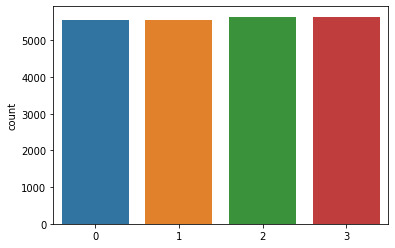

In [29]:
import seaborn as sns
sns.countplot(labels);
plt.show()

In [30]:
img_data_list = np.array(img_data_list)
img_data_list = img_data_list.astype('float32')
img_data_list /= 255
print (img_data_list.shape)

(22379, 256, 256)


In [31]:
num_channel=1
if num_channel==1:
    if K.image_data_format()=='th':
        img_data_list= np.expand_dims(img_data_list, axis=1)
        print (img_data_list.shape)
    else:
        img_data_list= np.expand_dims(img_data_list, axis=3)
        print (img_data_list.shape)

else:
    if K.image_data_format()=='th':
        img_data_list = np.rollaxis(img_data_list,3,1)
        print (img_data_list.shape)

(22379, 256, 256, 1)


In [32]:
# Define the number of classes
num_classes = 4

names = ['VKH','PCV','Normal','CSC']

# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

In [ ]:
# Split the dataset with 20% testing data
X_train, X_test, y_train, y_test = train_test_split(img_data_list, Y ,test_size = 0.20) #, random_state = 2